### Multiple linear regression model for the prediction of demand for shared bikes

**Problem Statement:**

A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.  
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

In [1]:
# importing the Libraries required
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [2]:
# Reading the dataset from csv file 
BoomBikes_df = pd.read_csv('day.csv')

Inspecting various aspects of the dataframe

In [3]:
# Check the head of the dataset
BoomBikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
BoomBikes_df.shape

(730, 16)

In [5]:
## Checking the column datatypes
BoomBikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
## Checking the statistics of numerical columns of dataset
BoomBikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Checking the Nullability of columns
BoomBikes_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
## Checking the duplicates in dataset
print('Shape before dropping duplicates : ', BoomBikes_df.shape)
BoomBikes_df.drop_duplicates(inplace=True)
print('Shape after dropping duplicates : ', BoomBikes_df.shape)

Shape before dropping duplicates :  (730, 16)
Shape after dropping duplicates :  (730, 16)


There are no duplicates as shape of dataset is same before and after dropping duplicates

## Step 2: Visualising the Data

#### Visualising Categorical Variables

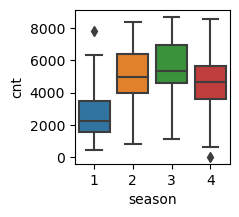

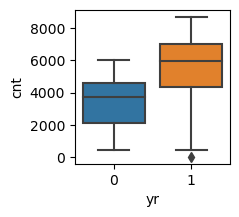

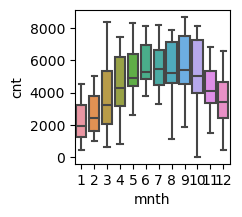

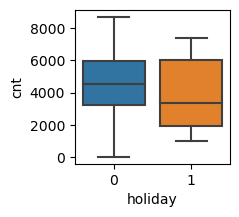

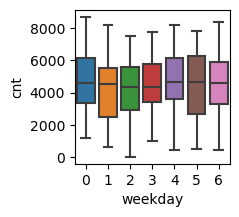

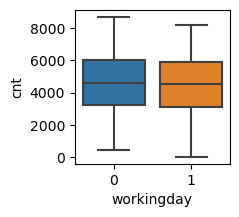

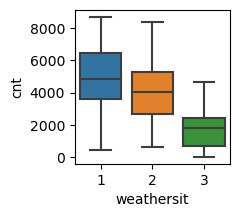

In [9]:
#plotting the box plot to check outliers
cols=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in cols:
    plt.figure(figsize=(2, 2))
    sns.boxplot(x = i, y = 'cnt', data = BoomBikes_df)
    plt.show()


There are no substantial outliers for remedial action

#### Visualising Numeric Variables

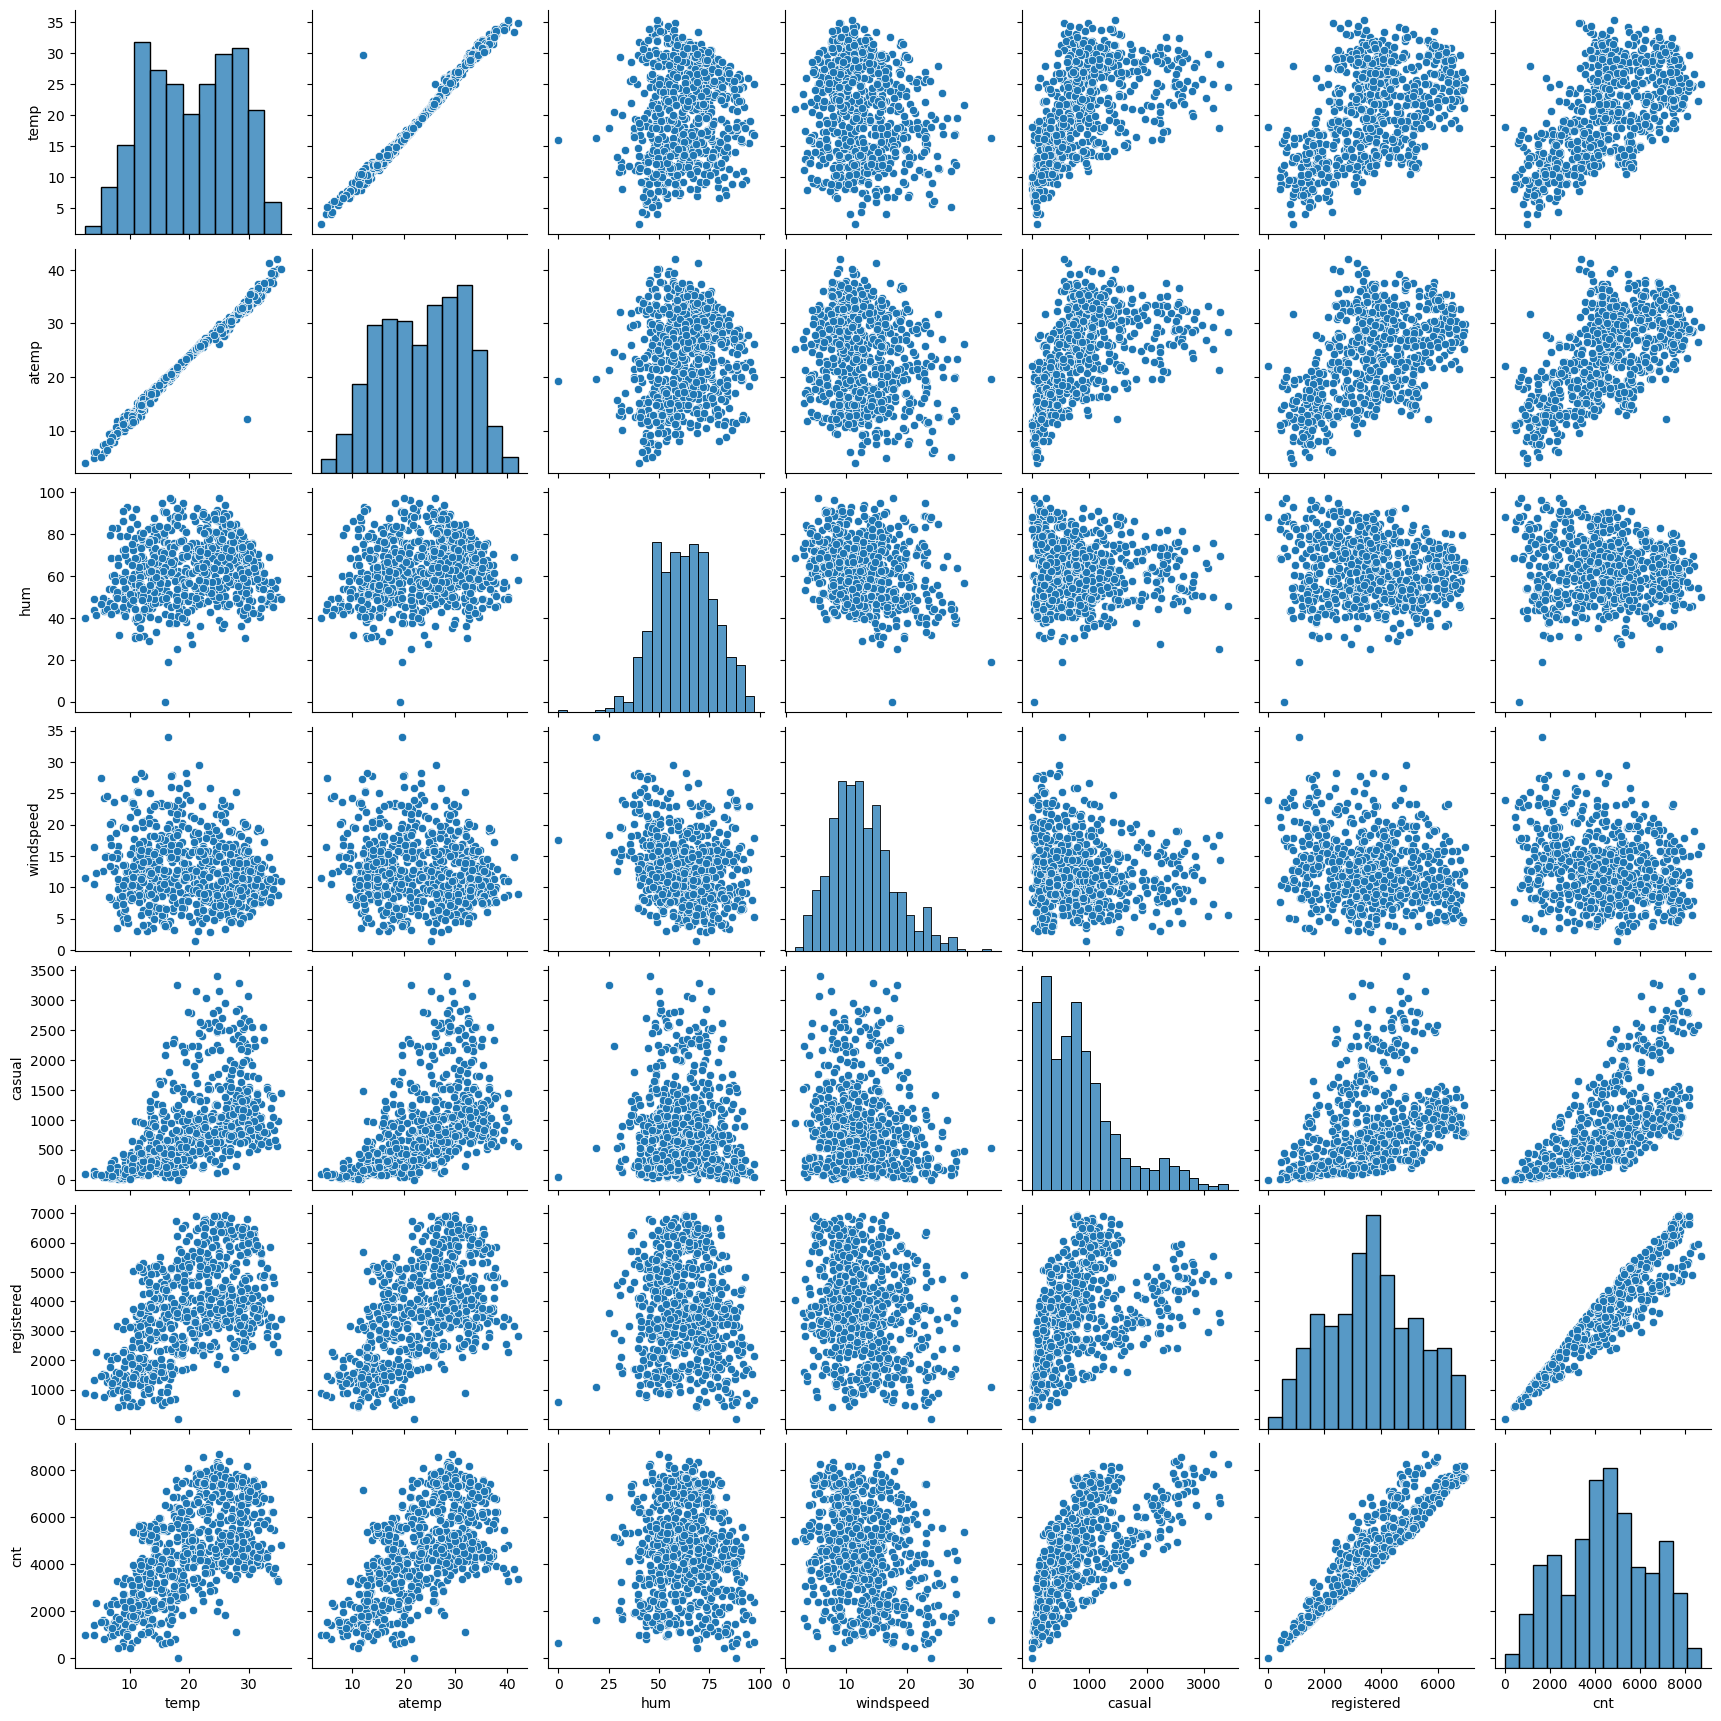

In [10]:
#Checking the correlation with pairplots 
cols=[ 'temp', 'atemp', 'hum','windspeed','casual','registered','cnt']
#cols=BoomBikes_df.columns.to_list()
#plt.figure(figsize = (15,30))
sns.pairplot(data=BoomBikes_df,vars=cols)
plt.show()

**Takeaways:**

temp and atemp have high corelation with the with each other.

Target variable cnt has high correlation with registered,casual, temp and atemp variables.

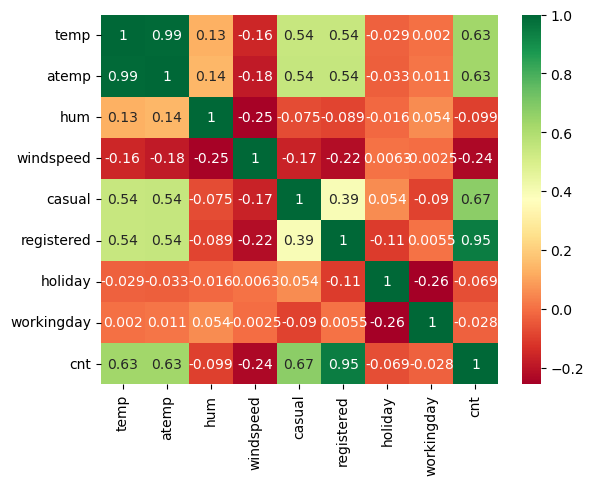

In [11]:
#Plotting correlation distribution across numerical variables for Target
cols=[ 'temp', 'atemp', 'hum','windspeed','casual','registered','holiday', 'workingday','cnt']
sns.heatmap(BoomBikes_df[cols].corr(), cmap="RdYlGn", annot = True)
plt.show()

**Takeaways:**

Heat Map also confirms that temp and atemp have 0.99 high corelation with the with each other.

Target variable cnt has high correlation with registered(0.95),casual(0.67), temp(0.63) and atemp(0.63) variables.

## Step 3: Data Preparation

#### 1. Converting feature values like 'weathersit' ,'season' ,mnth & weekday into categorical string values.
These features contains some order despite being numerical datatypes

In [12]:
BoomBikes_df.season = BoomBikes_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

BoomBikes_df.weathersit = BoomBikes_df.weathersit.map({1:'Clear' ,2: 'Mist' , 3: 'Light',4: 'Heavy'})

BoomBikes_df.mnth = BoomBikes_df.mnth.map(\
                  { 1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
                                         )
BoomBikes_df.weekday = BoomBikes_df.weekday.map(\
                  {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday',0:'Sunday'})

##BoomBikes_df.yr = BoomBikes_df.yr.map({0: '2018', 1:'2019'})


#### 2. Creating Dummy Variables
#### For k levels we need k-1 variables. 
So we will drop original column and one column that can be represented by remaining variables.

In [13]:
##Creating dummy variables for variables season,mnth,weekday,weathersit and dropping first column
BoomBikes_df = pd.get_dummies(data=BoomBikes_df,columns=['weathersit'])
BoomBikes_df = pd.get_dummies(data=BoomBikes_df,columns=['season','mnth','weekday'],drop_first=True)


In [14]:
# Check what the dataset looks like
BoomBikes_df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday
0,1,1/1/2018,0,0,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,1,0,0,0,0,0
1,2,2/1/2018,0,0,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,1,0
2,3,3/1/2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,1
3,4,4/1/2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,1,0,0
4,5,5/1/2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


#### 3. Dropping columns that are not required 

In [15]:
## Info in 'dteday' column is contained in yr/mnth/weekday  
## Info in 'instant' column is actually a rownum that is not required
## Target cnt already represents casual and registered values
BoomBikes_df = BoomBikes_df.drop(['instant','dteday','casual','registered'],axis =1)

## Step 4: Splitting the Data into Training and Testing Sets

In [16]:
## original dataset shape
print('original dataset shape:',BoomBikes_df.shape)

# Splitting the data into trainingset and testingset
train_df,test_df = train_test_split(BoomBikes_df,train_size=0.7, random_state=100)

## train and test dataset shape
print('X train set shape:',train_df.shape)
print('X test set shape:',test_df.shape)

original dataset shape: (730, 31)
X train set shape: (510, 31)
X test set shape: (220, 31)


#### 4.1 Rescaling the Features
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

We will use MinMax scaling.

In [17]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

# Scaling the countinous numerical columns except the boolean and dummy variables
cols = ['temp','atemp','hum','windspeed','cnt']
train_df[cols] = scaler.fit_transform(train_df[cols])

In [18]:
train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Clear,weathersit_Light,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
## Checking for Scaling of varables done 
train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Clear,weathersit_Light,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.625490,0.029412,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.484471,0.169124,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Takeaways:**
Scaling has been done correctly as all variables have min=0.0 and max=1.0

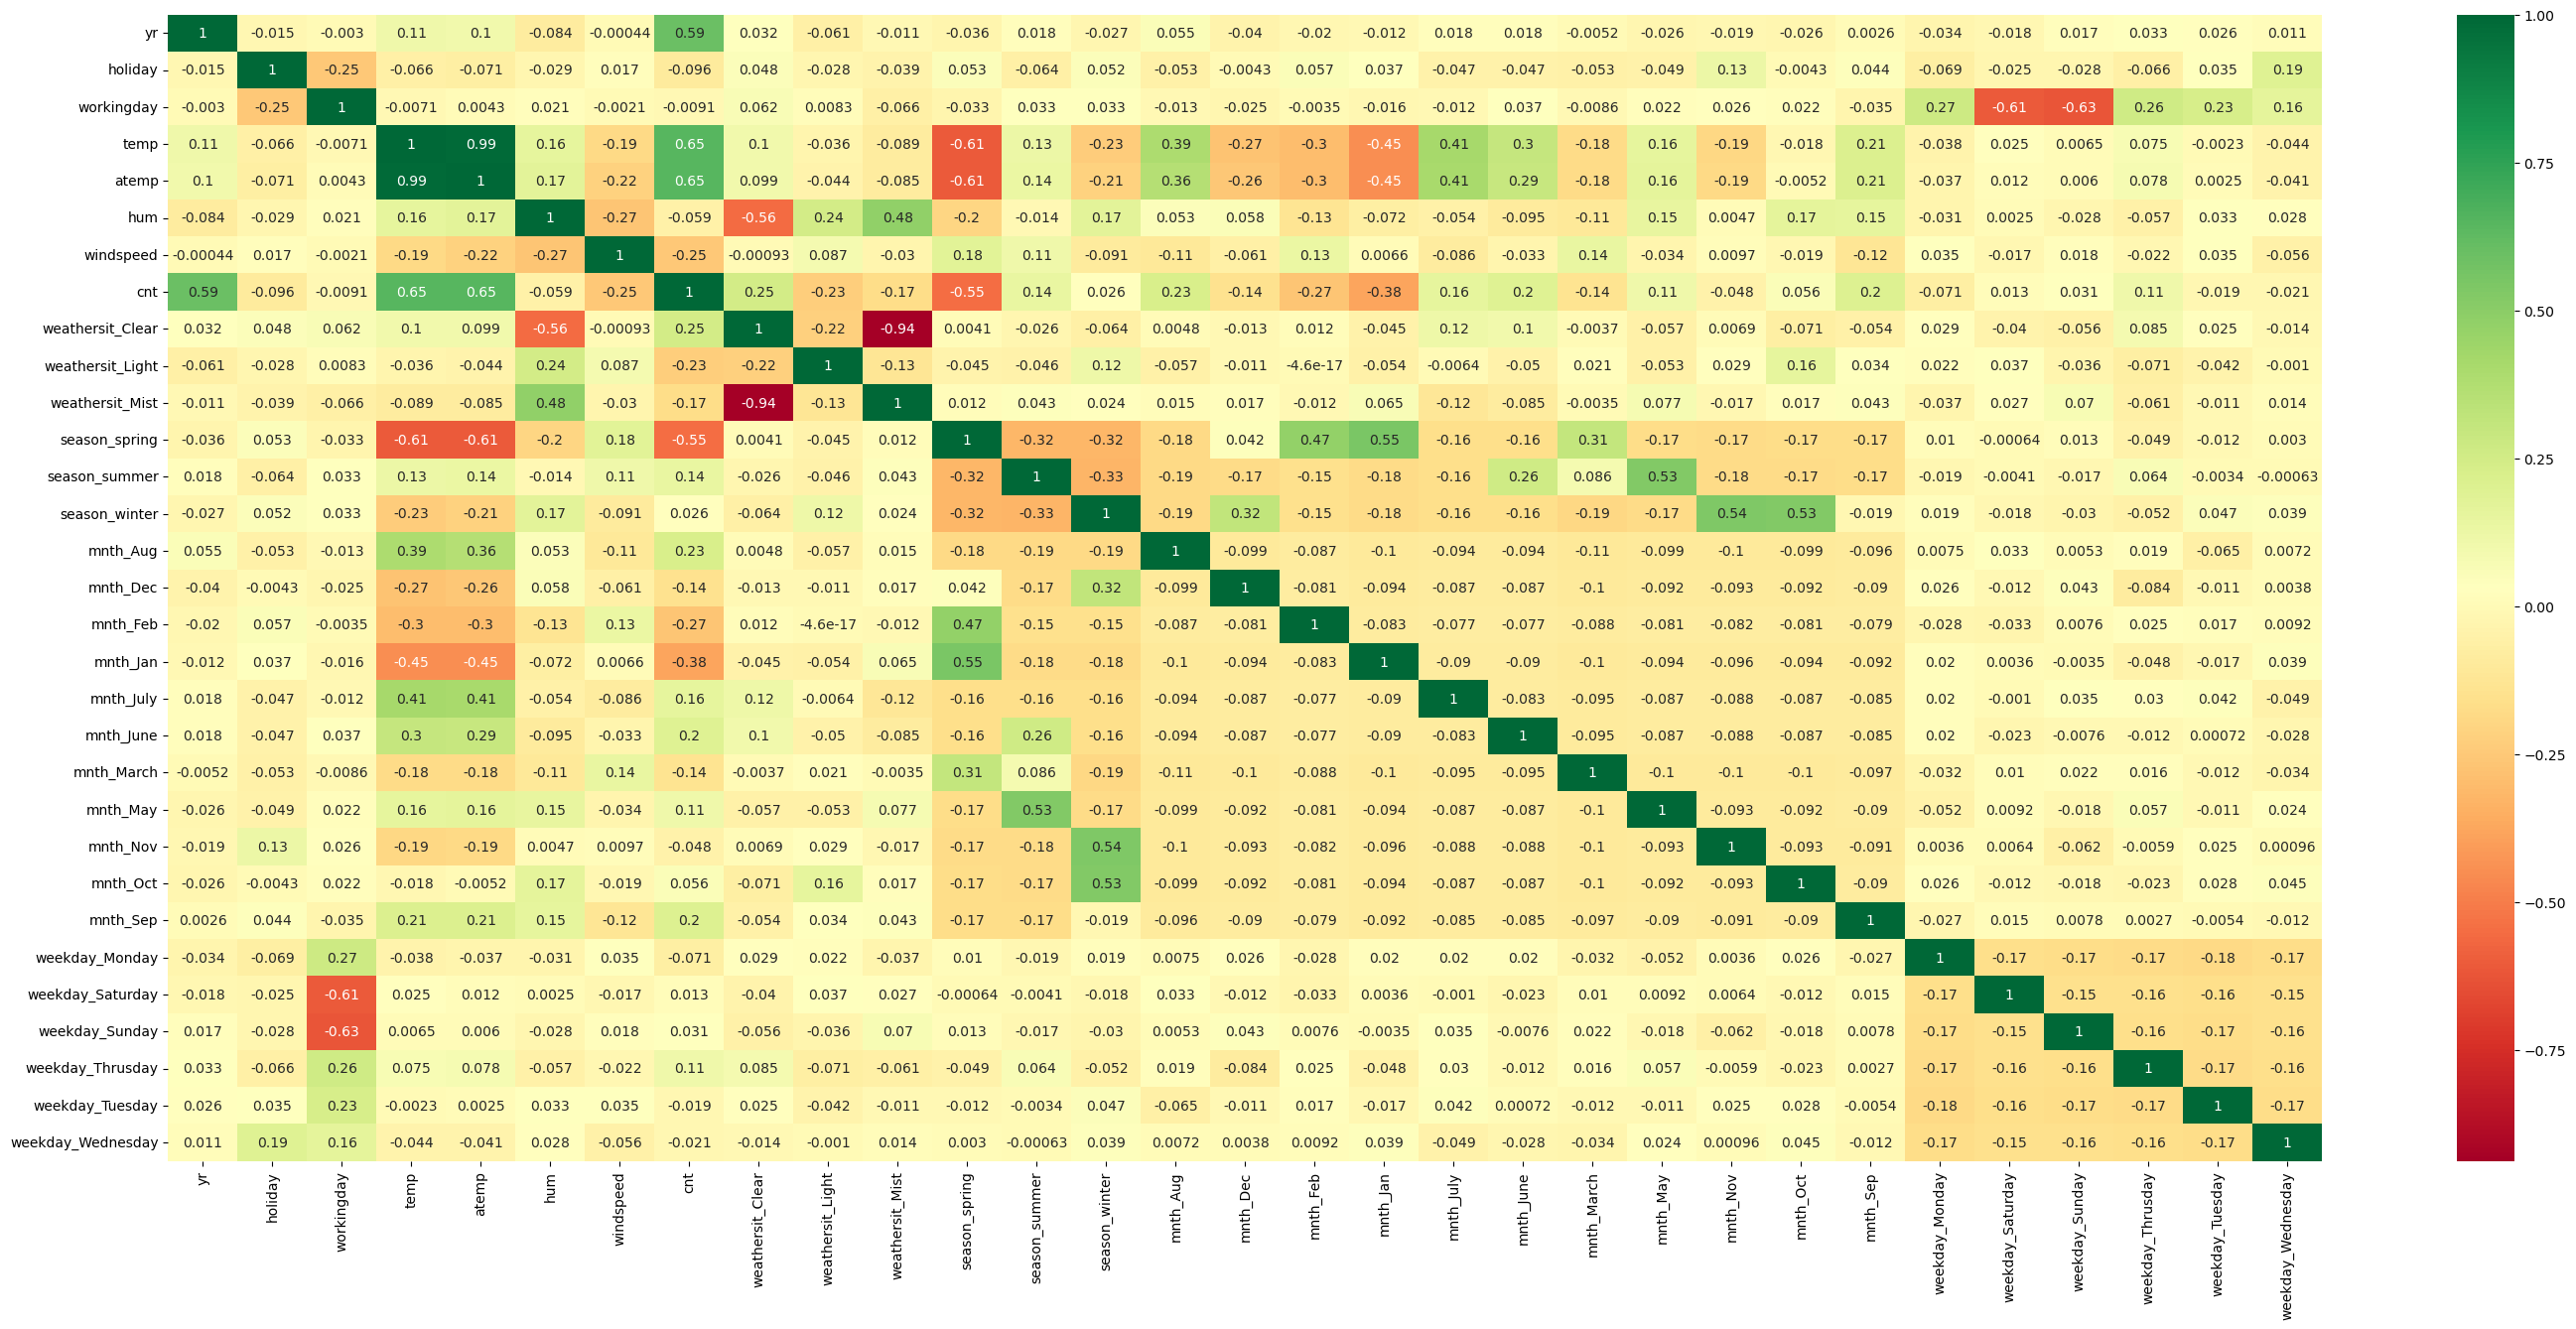

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (35, 15))
sns.heatmap(train_df.corr(), annot = True, cmap="RdYlGn")
plt.show()

temp,atemp seems to the correlated to cnt the most. Let's see a pairplot for temp,atemp vs cnt.

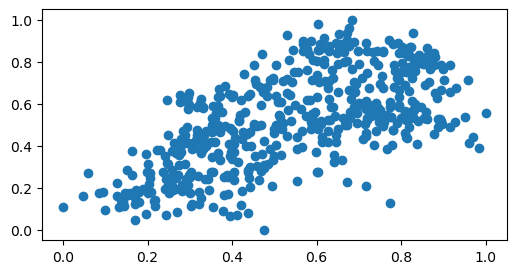

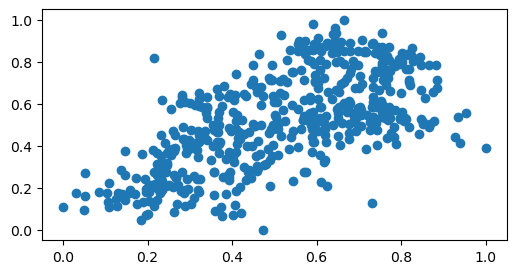

In [21]:
cols=['temp', 'atemp']
for i in cols:
    plt.figure(figsize=(6, 3))
    plt.scatter(train_df[i], train_df.cnt)
    plt.show()

#### 4.2: Training dataset preparation
Dividing into X and Y sets for the model building

In [22]:
##Train set splitting
y_train = train_df.pop('cnt')
X_train = train_df

print(X_train.shape)
print(y_train.shape)


(510, 30)
(510,)


## Step 5: Building a linear model

In [23]:
# Building Linear Regression model
lr = LinearRegression()
lr.fit(X_train,y_train)
# Running RFE on the 
rfe = RFE(lr)
rfe = rfe.fit(X_train, y_train)

In [24]:
##list of features with ranking as per RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light', True, 1),
 ('weathersit_Mist', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 16),
 ('mnth_May', False, 10),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 6),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 15),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 12)]

In [25]:
# features not selected by RFE
X_train.columns[~(rfe.support_)]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Oct', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [26]:
# features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weathersit_Clear',
       'weathersit_Light', 'weathersit_Mist', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep'],
      dtype='object')

In [27]:
# Creating a dataframe with variables selected as per RFE
X_train_rfe_df = X_train[cols]
X_train_rfe_df.head()

,yr,holiday,temp,hum,windspeed,weathersit_Clear,weathersit_Light,weathersit_Mist,season_spring,season_summer,season_winter,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep
576,1,0,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,1,1,0,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,1,0,1,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,0,0,1,0,1,0,0,0,0,0


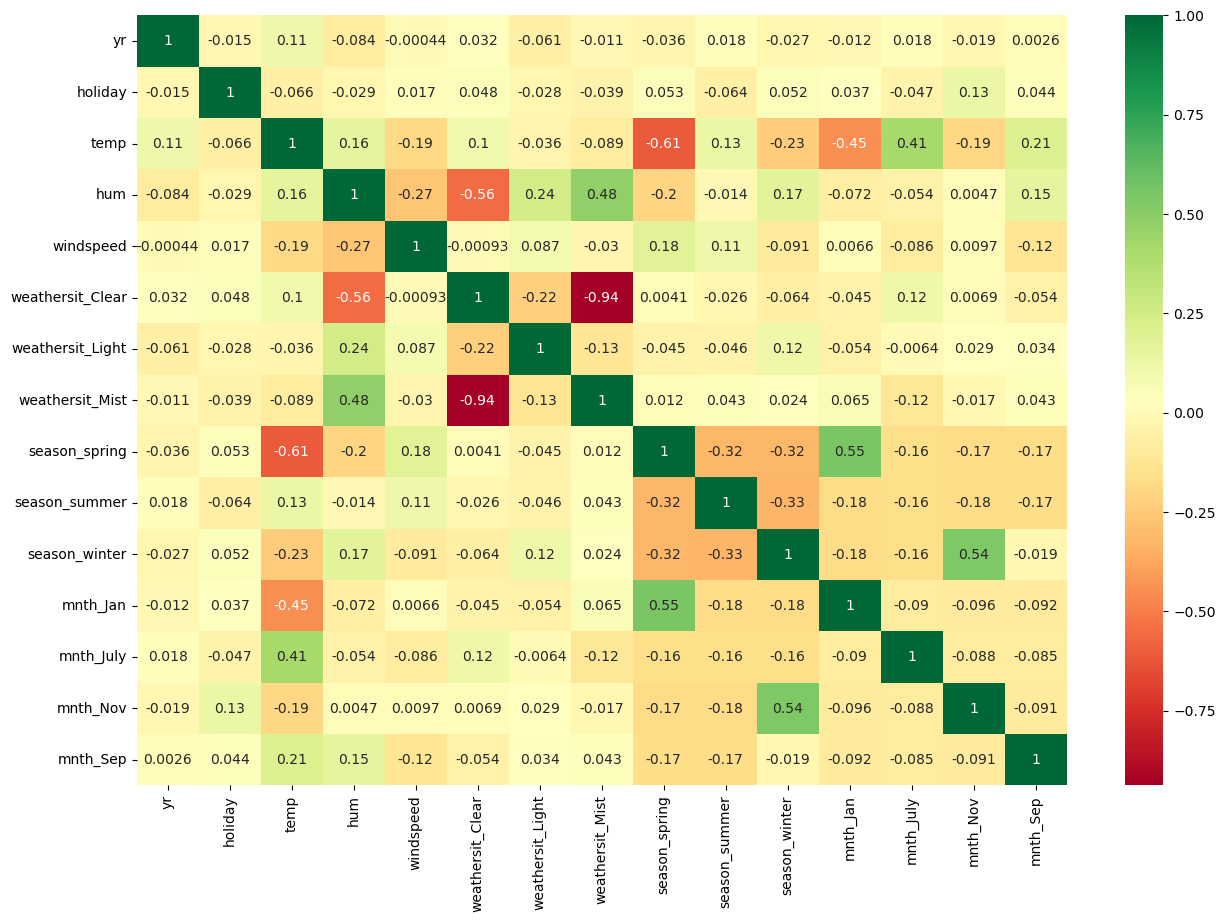

In [28]:
#Plotting correlation distribution 
plt.figure(figsize = (15,10))
sns.heatmap(X_train_rfe_df.corr(), cmap="RdYlGn", annot = True)
plt.show()

#### Checking VIF of variables selected as per RFE

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖=11−𝑅𝑖2
 

In [29]:
# function for VIF calculation

def VIF_Cal(cols):
    VIF_df = pd.DataFrame()

    VIF_df['Predictors'] = X_train_rfe_df[cols].columns

    VIF_df['VIF_value'] = [variance_inflation_factor(X_train_rfe_df[cols].values, n) for n in range(len(X_train_rfe_df[cols].columns))]
    VIF_df['VIF_value'] = round(VIF_df['VIF_value'], 2)

    print(VIF_df.sort_values(by = "VIF_value", ascending = False))


In [30]:
#Function to build a model 
def LR_model_build(cols):
    ## Adding a constant
    X_train_lr = sm.add_constant(X_train_rfe_df[cols])
    
    ## Creating & fitting a model
    lr = sm.OLS(y_train, X_train_lr).fit()
    
    ## Model Summary
    print(lr.summary())
    
    return lr

#### 4.6 Buiding Linear regression model with statsmodels and Ordinary Least Squares regression (OLS) technique

#### Model No.1

In [31]:
cols=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weathersit_Clear',
       'weathersit_Light', 'weathersit_Mist', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep']
## Calling function to build LR Model
LR_model_build(cols)

##Calling function to check VIF of variables
VIF_Cal(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          4.41e-189
Time:                        18:53:11   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1541      0.029  

#### Dropping the variable and updating the model ( Model No.2)

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop. Dropping highly correlated variables and insignificant variables.

Remove variables with high VIF (>2 generally) and which are insignificant (p>0.05), one by one

If the model has variables which have a high VIF and are significant, check and remove other insignificant variables

In [32]:
# Dropping the variable 'season_spring' as it has high VIF and is insignificant 
## as compared to other variables which have high VIF but are significant 
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weathersit_Clear',
       'weathersit_Light', 'weathersit_Mist', 'season_summer',
       'season_winter', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep']
## Calling function to build LR Model
LR_model_build(cols)

##Calling function to check VIF of variables
VIF_Cal(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.4
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          9.82e-189
Time:                        18:53:14   Log-Likelihood:                 508.48
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     496   BIC:                            -929.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1136      0.025  

#### Dropping the variable and updating the model (Model No.3)

In [33]:
# Dropping the variable 'mnth_Jan' as it has high VIF and is insignificant 
## as compared to other variables which have high VIF but are significant 
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weathersit_Clear',
       'weathersit_Light', 'weathersit_Mist', 'season_summer',
       'season_winter', 'mnth_July', 'mnth_Nov', 'mnth_Sep']
## Calling function to build LR Model
LR_model_build(cols)

##Calling function to check VIF of variables
VIF_Cal(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          7.48e-189
Time:                        18:53:16   Log-Likelihood:                 505.96
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     497   BIC:                            -930.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1000      0.024  

#### Dropping the variable and updating the model (Model No.4)

In [34]:
# Dropping the variable 'mnth_Nov' as it has high VIF and is insignificant 
## as compared to other variables which have high VIF but are significant 
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weathersit_Clear',
       'weathersit_Light', 'weathersit_Mist', 'season_summer',
       'season_winter', 'mnth_July', 'mnth_Sep']
## Calling function to build LR Model
LR_model_build(cols)

##Calling function to check VIF of variables
VIF_Cal(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          6.89e-190
Time:                        18:53:18   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0992      0.024  

#### Dropping the variable and updating the model (Model No.5)

In [35]:
# Dropping the variable 'mnth_July' as it has high VIF and is insignificant 
## as compared to other variables which have high VIF but are significant 
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weathersit_Clear',
       'weathersit_Light', 'weathersit_Mist', 'season_summer',
       'season_winter', 'mnth_Sep']
## Calling function to build LR Model
LR_model_build(cols)

##Calling function to check VIF of variables
VIF_Cal(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          1.32e-189
Time:                        18:53:19   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0982      0.024  

#### Dropping the variable and updating the model (Model No.6)

In [36]:
# Dropping the variable 'weathersit_Clear' as it has high VIF and is insignificant 
## as compared to other variables which have high VIF but are significant 
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'weathersit_Light', 'weathersit_Mist', 'season_summer',
       'season_winter', 'mnth_Sep']
## Calling function to build LR Model
LR_model_build(cols)

##Calling function to check VIF of variables
VIF_Cal(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          1.32e-189
Time:                        18:53:21   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2261      0.027  

#### Dropping the variable and updating the model  (Model No.7)

In [37]:
# Dropping the variable 'hum' as it has high VIF and is insignificant 
## as compared to other variables which have high VIF but are significant 
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'weathersit_Light', 'weathersit_Mist', 'season_summer',
       'season_winter', 'mnth_Sep']
## Calling function to build LR Model
LR_model_build(cols)

##Calling function to check VIF of variables
VIF_Cal(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          2.83e-186
Time:                        18:53:22   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1259      0.017  

#### Interpreting the Final Model

We can consider the model No.7 as final model, as it has 

* R-squared & Adj. R-squared are pretty high
* Low VIF (<5) for all predictors selected
* Highly significant (p=0.0) 
* very low multicolinearity between the predictors
* High value of F-Statistics value of 271.9 
* Very low p-value of 2.83e-186 

Therefore, the final predictors on the target variable 'cnt' are:

'yr', 'holiday', 'temp', 'windspeed','weathersit_Light', 'weathersit_Mist','season_summer','season_winter', 'mnth_Sep'


### Step 7: Residual Analysis of the train data

#### 5.1 Residual Analysis and validation

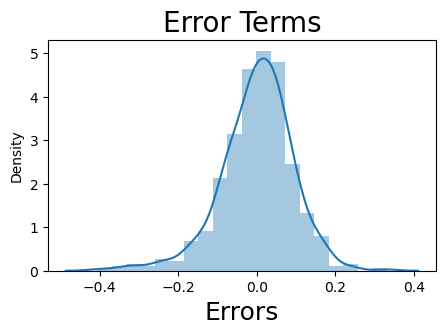

In [38]:
## Adding a constant
X_train_lr = sm.add_constant(X_train_rfe_df[cols])
    
## Creating & fitting a model
lr = sm.OLS(y_train, X_train_lr).fit()

# Calculation of Error in Prediction for Training Data
y_train_pred = lr.predict(X_train_lr)
res = y_train - y_train_pred

# Ploting of Residuals
plt.figure(figsize = (5,3))
sns.distplot(res, bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

Clearly from the above graph it can be seen that the error terms have a normal distribution with mean centered at zero.

#### 5.2 Multicollinearity

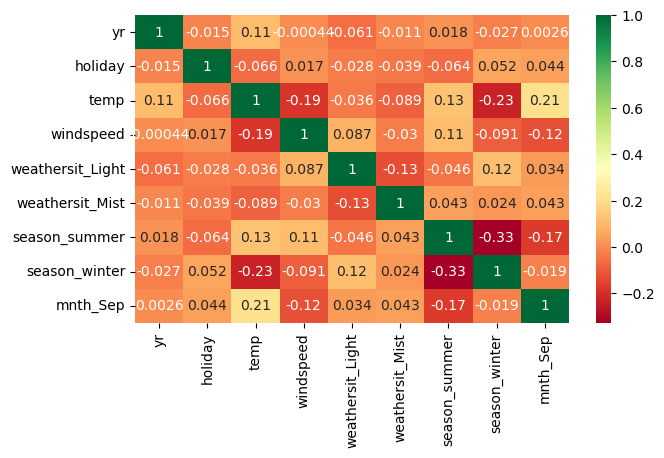

In [39]:
#Plotting correlation distribution 
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'weathersit_Light', 'weathersit_Mist', 'season_summer',
       'season_winter', 'mnth_Sep']
plt.figure(figsize = (7,4))
sns.heatmap(X_train_rfe_df[cols].corr(), cmap="RdYlGn", annot = True)
plt.show()

As shown from the heatmap all correlation values are <0.21.
Therefore, it can be concluded that there is no multicolinearity in the model.

#### 5.3 Homoscedasticity for Training dataset

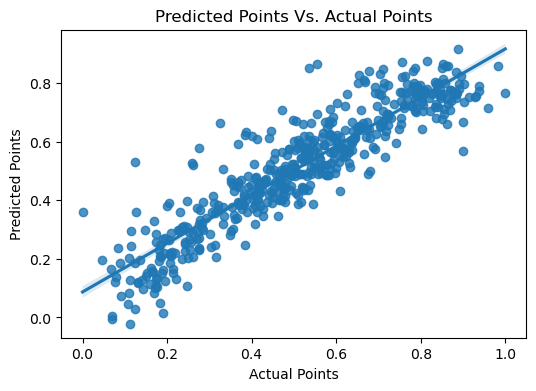

In [40]:
#Checking Constant Variance for Homoscedasticity
plt.figure(figsize = (6,4))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 7th model.

#### Applying the scaling on the test sets

In [41]:
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Clear,weathersit_Light,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
cols = ['temp','atemp','hum','windspeed','cnt']

test_df[cols] = scaler.transform(test_df[cols])

In [43]:
test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Clear,weathersit_Light,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.654545,0.027273,...,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.476601,0.163248,...,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [44]:
## test set splitting
y_test = test_df.pop('cnt')
X_test = test_df

print(X_test.shape)
print(y_test.shape)

(220, 30)
(220,)


In [45]:
cols = ['yr', 'holiday', 'temp', 'windspeed',
       'weathersit_Light', 'weathersit_Mist', 'season_summer',
       'season_winter', 'mnth_Sep']

# Creating X_test_lm_7 dataframe for features considered in 7th model
X_test_lm_7 = X_test[cols]

# Adding constant variable to test dataframe
X_test_lm_7 = sm.add_constant(X_test_lm_7)
X_test_lm_7.head()

,const,yr,holiday,temp,windspeed,weathersit_Light,weathersit_Mist,season_summer,season_winter,mnth_Sep
184,1.0,0,1,0.831783,0.084219,0,1,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,1,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,1,0,0


In [46]:
y_test_pred = lr.predict(X_test_lm_7)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

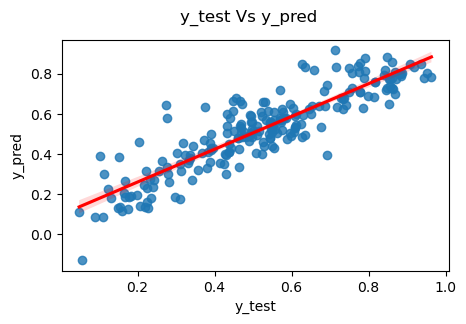

In [47]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize = (5,3))
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True, line_kws={'color': 'red'})
fig.suptitle('y_test Vs y_pred', fontsize =12)              # Plot heading 
plt.xlabel('y_test', fontsize = 10)                          # X-label
plt.ylabel('y_pred', fontsize = 10)      

The above graph shows the Linear relationship between actual and predicted count based on test data for bikes on rent.

In [48]:
## calculating r2 score
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.7942

* r2 score for final model is good score of aprrox 79.42%.
* The difference between the training and test dataset is approx. 3.4%  within acceptable limits.

In [49]:
## **Coefficient values of final model i.e. Model No.7**
round(lr.params,4)

const               0.1259
yr                  0.2329
holiday            -0.0987
temp                0.5480
windspeed          -0.1532
weathersit_Light   -0.2829
weathersit_Mist    -0.0784
season_summer       0.0881
season_winter       0.1293
mnth_Sep            0.1012
dtype: float64

**Coefficient values of Model No.7**

const	0.1259

yr	    0.2329

holiday	-0.0987

temp	0.548

windspeed	-0.1532

weathersit_Light	-0.2829 

weathersit_Mist	-0.0784 

season_summer	0.0881 

season_winter	0.1293

mnth_Sep	0.1012

**Equation of best fit line on the basis of model No.7:**

cnt = 0.1259 + (yr × 0.2329) - (holiday × 0.0987) + (temp × 0.548) − (windspeed × 0.1532) - (weathersit_Light x 0.2829) - (weathersit_Mist × 0.0784) + (season_summer ×0.0881) + (season_winter × 0.1293) + (mnth_Sep ×0.1012) 

**Major Takeaways:**

1. Significant predictors for the demand of shared bikes are:

* year,
* holiday, 
* temperature, 
* windspeed, 
* weathersit(Light,Mist), 
* season(summer,winter), 
* Month(September)

2. Most significant predictor is temperature followed by Year & Winter season

3. Holiday, Windspeed & weathersit(Light,Mist) predictors have negative effect on the demand.

4. As Year is among top 3 predictors, it's quite evident that compared to year 2018, there is a remarkable growth in the demand of shared bikes.

4. Company can increase the supply in Summer and winter season are target is positively related to these seasons as compared to other seasons.

5. Company can decrease the supply on holidays as people do not prefer bike sharing on these days which can be understood by negatively related predictor to target.

6. Company should prioritize its supply especially during September month.